In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook, plots are configured to be rendered as images because otherwise they won't display correctly on GitHub or when the notebook is loaded (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.


# Temperature forecasting with periodic averages


This notebook showcase the periodic average forecatser of [Timeseria](https://github.com/sarusso/Timeseria).

This is a very simple (yet somehow powerful) forecaster which simply computes the periodicity in the data and then the average values within that period. It fits nearly instantaneously and it has the very same interfaces as its more powerful counterparts as the neural network-based ones, making it perfect for demonstrative purposes.

Let's start by loading an example time series, and resample it to one hour:

In [2]:
from timeseria import TEST_DATASETS_PATH
from timeseria.datastructures import TimeSeries
timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'temperature.csv').resample('1h')

[INFO] timeseria.transformations: Using auto-detected sampling interval: 600.0s
[INFO] timeseria.transformations: Resampled 18331 DataTimePoints in 3189 DataTimePoints


Have a look at the time series we just loaded 

In [3]:
timeseries

Time series of #3189 points at 1h resolution, from point @ 1546480800.0 (2019-01-03 02:00:00+00:00) to point @ 1557957600.0 (2019-05-15 22:00:00+00:00)

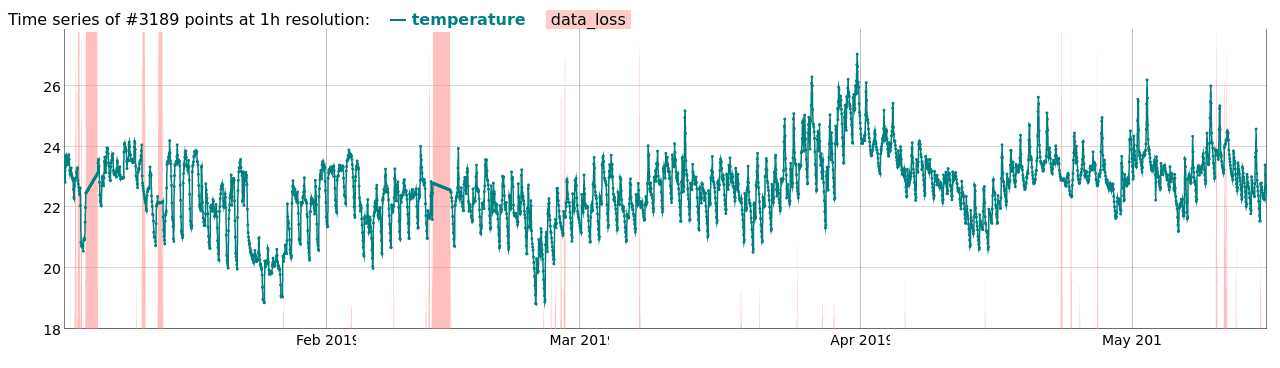

In [4]:
timeseries.plot()

Instantiate and fit the model

In [5]:
from timeseria.models import PeriodicAverageForecaster

forecaster = PeriodicAverageForecaster()
forecaster.fit(timeseries)

[INFO] timeseria.models.forecasters: Detected periodicity for "temperature": 24x 1h
[INFO] timeseria.models.forecasters: Using a window of "24" for "temperature"


Call the `predict()` function of the model. This returns key-value data with the prediction values

In [6]:
forecaster.predict(timeseries)

[{'temperature': 22.331616053953724}]

The timeseries on which to call the predict has to be at least of 24 hours (the window length):

In [7]:
try:
    forecaster.predict(timeseries[0:23])
except Exception as e:
    print(e)

The series length (23) is shorter than the model window (24)


The predict function of this forecaster can also take as argument how many steps-ahead to predict

In [8]:
forecaster.predict(timeseries, steps=3)

[{'temperature': 22.331616053953724},
 {'temperature': 22.115292107591024},
 {'temperature': 21.87780210759029}]

To get also the timestamps, use the `forecast()` method, which returns data point objects:

In [9]:
forecaster.forecast(timeseries, steps=3)

[Time point @ 1557961200.0 (2019-05-15 23:00:00+00:00) with data "{'temperature': 22.331616053953724}",
 Time point @ 1557964800.0 (2019-05-16 00:00:00+00:00) with data "{'temperature': 22.115292107591024}",
 Time point @ 1557968400.0 (2019-05-16 01:00:00+00:00) with data "{'temperature': 21.87780210759029}"]

The `apply()` method allows instead to directly apply the model on a time series (by combining the forecasts with the real observations)

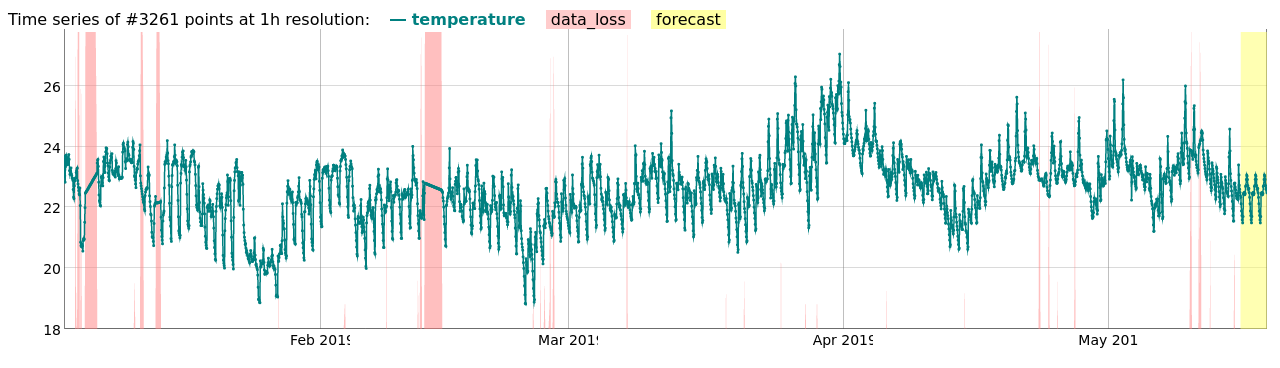

In [10]:
forecaster.apply(timeseries, steps=24*3).plot()

Forecasters also supports the `evaluate()` method to evaluate them. By default, forecasters get evaluated with RMSE and MAE error metrics:

In [11]:
forecaster.evaluate(timeseries)

{'temperature_RMSE': 0.5555709390382183,
 'temperature_MAE': 0.41686544664846376}

For more advanced modes of evaluation, including using other error metrics, plotting the error distribution and/or the predictions, check out the "Forecasting - Advanced Evaluation" notebook.